## Context
1. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed
2. The classification goal is to predict if the client will subscribe a term deposit (variable y)
3. Attribute information:Input variables:
    1. age (numeric)
    2. job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
    3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4. education (categorical: "unknown","secondary","primary","tertiary")
    5. default: has credit in default? (binary: "yes","no")
    6. balance: average yearly balance, in euros (numeric)
    7. housing: has housing loan? (binary: "yes","no")
    8. loan: has personal loan? (binary: "yes","no")
    9. contact: contact communication type (categorical: "unknown","telephone","cellular")
    10. day: last contact day of the month (numeric)
    11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12. duration: last contact duration, in seconds (numeric)
    13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15. previous: number of contacts performed before this campaign and for this client (numeric)
    16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
    17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
main_df = pd.read_csv("bank-full.csv", sep=";")
main_df.head()

# Extracting csv data from machine and reading data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
main_df.shape

# Data dimension (Rows, Columns)

(45211, 17)

In [4]:
df = pd.DataFrame(main_df)
df.info()

# Making a copy of the main data set and checking for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no missing values present in this data set

In [5]:
df.nunique()

# All unique values present in the data set (df)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
df.describe()

# Data set description, to identify the statistical values of each variable

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above description, it is understood that:
1. Age: 
    1. Age group demographic:
        1. The minimum age group present is 18 years old
        2. The maximum age group present is 95 years old
2. Balance:
    1. The mean balance (EUR) is 1,362 euros
    2. The minimum balance is -8,019 euros (i.e. indicator of defaulter)
    3. The maximum balance is 102,127 euros
3. Duration:
    1. The minimum call/ conversation duration is 0 (i.e. indicator or no contact/ failed to connect)
    2. The maximum call/ conversation duration is 4,918 seconds (i.e. approx. 82 mins)
4. Campaign:
    1. Variable information: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
        1. The minimum contacts performed is 1
        2. The maximum contacts performed is 63
        3. Assumption: Possible presence of outliers in data
5. Pdays:
    1. The minimum pday value is -1 (i.e. client was not previously contacted)
    2. The maximum pday value is 871 days (i.e. approx. 2years 3months)
6. Previous:
    1. The minimum previous contact value is 0
    2. The maximum previous contact value is 275

In [7]:
df['job'].value_counts().all

# To find total counts of each unique value in the selected variable

<bound method Series.all of blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64>

From the above, we can interpret that the bank's most important segment/ target clients, with whom they have contacted are:
1. Blue-collar clients
2. Clients of management background/ occupation
3. Techincians

In [8]:
df['y'].value_counts().all

<bound method Series.all of no     39922
yes     5289
Name: y, dtype: int64>

From the above it is clear that majority of the clients have NOT taken/ subscribed a term deposit with the bank

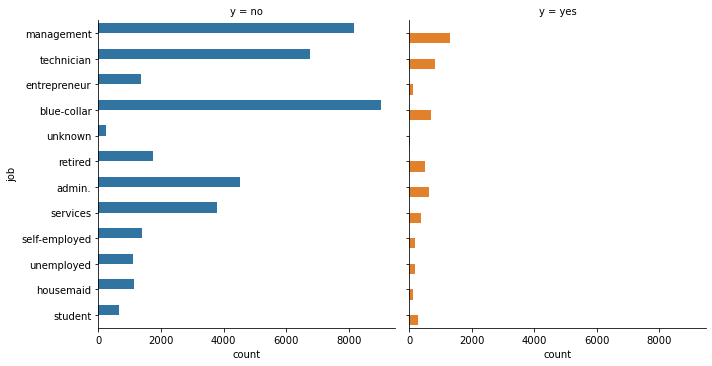

In [9]:
g = sns.catplot(y='job', col = 'y',hue='y', data=df, kind='count')

From the above graph, we now get a much clear idea of which class of variable 'job' HAVE and have NOT taken a term loan from this bank

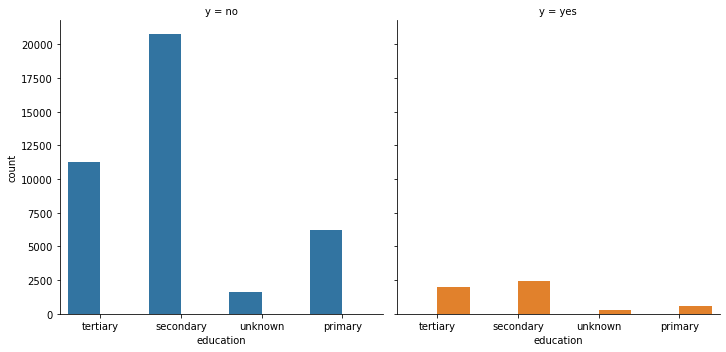

In [10]:
g = sns.catplot(x='education',hue='y',col='y', data=df, kind='count')

From the above graph, we can identify that:
1. Although a majority of the Secondary educated class have a maximum count of 'NO', the same group appears to be having maximum count of 'YES' too, which indicates that the banks have been targetting Secondary education class the maximum
2. The Tertiary educated class has a count of more than 10,000, and yet the conversion rate as compared to Secondary educated class seems to be higher

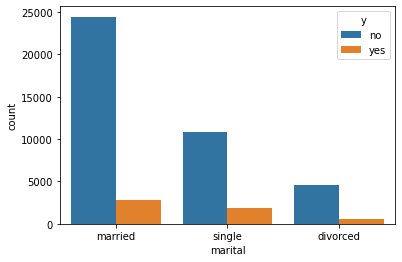

In [11]:
g = sns.countplot(df['marital'], hue=df['y'])

From the above graph we can understand that:
1. The bank has been primarily targetting the Married class, yet the conversion rate seems to be not so satisfactory as compared to Single class

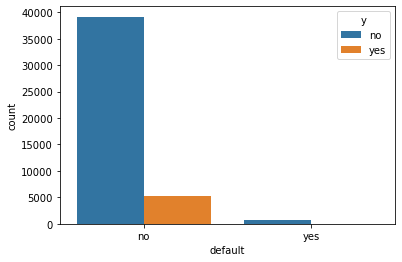

In [12]:
g = sns.countplot(df['default'], hue=df['y'])

Here, from the above graph, we can understand that the NON-DEFAULTER class has been the primary target of the bank, and also those DEFAULTERS whose application MIGHT HAVE BEEN processed did not subscribe to the bank's term deposit

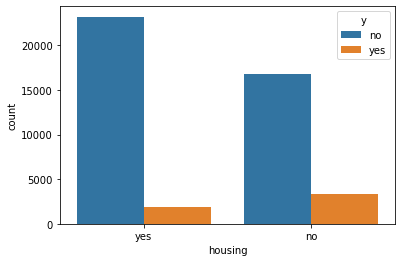

In [13]:
g = sns.countplot(df['housing'], hue=df['y'])

From the above graph, here we can understand that those class that DID NOT have any housing loan have subscribed to the bank's term deposit more than those who DO HAVE a housing loan

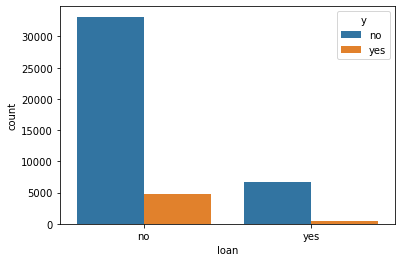

In [14]:
g = sns.countplot(df['loan'], hue=df['y'])

From the above graph, it is evident that a very few class of clients that HAVE a loan have subscribed to the term deposit

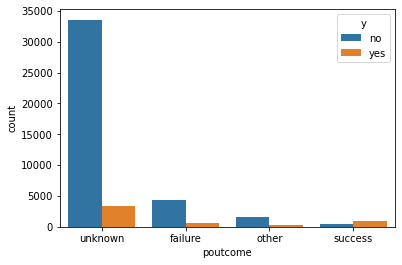

In [15]:
g = sns.countplot(df['poutcome'], hue=df['y'])

From the above graph and all above graphs, we can understand that the bank's converstion rate is very low.

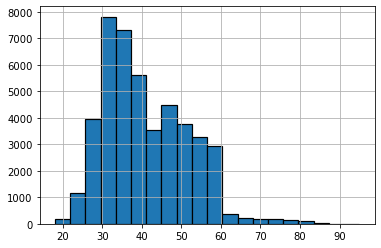

In [16]:
df['age'].hist(edgecolor='black', linewidth=1.2, bins=20)

From the histogram above, we can understand that, the target audience of the bank is between the age group of early 30's to early 40's

In [17]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


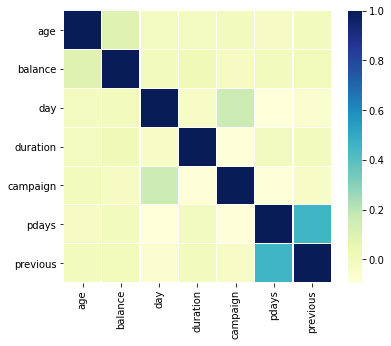

In [18]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Checking for correlation and plotting it on a heatmap

From the above two correlation information, we can understand that:
1. pdays and previous are positively correlated (0.45)
2. Majority of the variables of this data set don't have any correlation with each other

But, we don't want to drop or accept variables based on the correlation information, because here we need to keep variables that are significantly important from a bank's perspective.

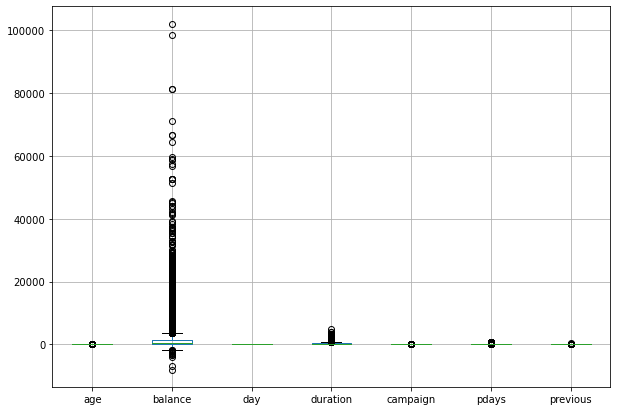

In [19]:
df.boxplot(figsize=(10,7))
# Create Boxplot to check for outliers in the entire dataset (df)

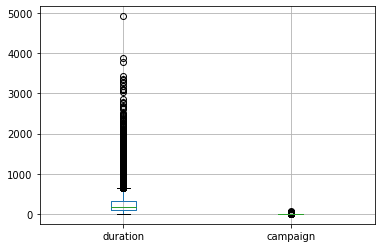

In [20]:
df.boxplot(['duration','campaign'])

In [21]:
q1 = df.quantile(0.25) #first quartile value
q2 = df.quantile(0.50) #second quartile value
q3 = df.quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

from tabulate import tabulate

high_low = pd.concat([high, low, q2], join = 'outer', axis = 1)
print(tabulate(high_low, headers=['Index', 'High', 'Low' , 'Median'], tablefmt='presto'))

# Finding the IQR for the given data, this helps in understanding for treatment of outliers

 Index    |   High |     Low |   Median
----------+--------+---------+----------
 age      |   70.5 |    10.5 |       39
 balance  | 3462   | -1962   |      448
 day      |   40.5 |   -11.5 |       16
 duration |  643   |  -221   |      180
 campaign |    6   |    -2   |        2
 pdays    |   -1   |    -1   |       -1
 previous |    0   |     0   |        0


In [22]:
df.drop(['marital','housing'], axis=1, inplace= True)

# Dropping variables that are not important while evaluating the target variable

Reasons for dropping above specified variables:
1. Marital - As seen earlier in the bar graph, the Marital status of an individual does not affect the subscription of term deposit, as there is a marginal difference in the conversion rate among the classes
2. Housing - This variable is dropped because, as seen earlier in the graph where the conversion rate for housing is observed, it is evident that both classes, the ones who HAVE a housing loan and the second class that does NOT HAVE a housing loan, both nearly equally have subscribed for the the term deposit, indicating that irrespective of the output of the Housing variable, the chances are near to equal, so dropping such variable is okay as it will help in building a model that is effective

In [23]:
df.head()

,age,job,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
print(df.groupby(['poutcome', 'y']).size())
print()
print(pd.crosstab(df.y, df.job))

# Using groupby method to identify outcomes based on target variable

poutcome  y  
failure   no      4283
          yes      618
other     no      1533
          yes      307
success   no       533
          yes      978
unknown   no     33573
          yes     3386
dtype: int64

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     4540         9024          1364       1131        8157     1748   
yes     631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1392      3785      669        6757        1101      254  
yes            187       369      269         840         202       34  


From the above code line, we can understand that:
1. poutcomes X y
    1. Most of the subscribers are from the UNKNOWN category - However maximum instances also occur in the same category
    2. The subscribers rate in the SUCCESS category is more that non-subscribers
    3. Subscribers from the remaining two categories (FAILURE and OTHER) are significantly less as compared to the non-subscribers
    4. The total number of instances in the UNKNOWN category is very high when comparing with the rest of the categories (i.e., FAILURE, OTHERS and SUCCESS), therefore the bank must in order to maintain good data must focus on filtering clients in the respective category, also a deeper analysis in the same category can help us understand the UNKNOWN category more clearly

2. job X y
    1. Major conversion is observed in (MANAGEMENT, TECHNICIAN, BLUE-COLLAR, ADMIN, and RETIRED)
    2. Least conversion is observed in (UNKNOWN, HOUSEMAID, ENTREPRENEUR, SELF-EMPLOYED, and UNEMPLOYED)
    3. Surprisingly the ratio at which STUDENTS have subscribed for term loan is higher as compared to the rest of the category - Surprising because majority of the students are unemployed or have a cut-to-cut income and expenditure
    4. Although maximum conversion have been seen in the MANAGEMENT, TECHNICIAN, BLUE-COLLAR, and ADMIN, the ratio of subscribers against non-subscribers in these classes are very less
    5. The target for the bank based on the job to target variable analysis should be to target:
        1. Students = 40% conversion rate (subscribers against non-subscribers)
        2. Retired = 29.5% conversion rate (subscribers against non-subscribers)
        3. Unemployed = 18% conversion rate (subscribers against non-subscribers)


In [25]:
print(df['contact'].value_counts().all)

<bound method Series.all of cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64>


In [26]:
pd.crosstab(df.job, df.campaign)

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44,46,50,51,55,58,63
job,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admin.,2270,1368,590,346,161,117,77,56,30,21,27,21,21,6,12,5,8,2,7,0,4,3,0,1,3,1,2,1,1,2,2,2,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
blue-collar,3660,2707,1275,747,395,278,168,113,65,64,36,32,26,19,15,15,17,15,9,17,9,7,5,5,5,5,1,4,3,0,1,3,0,0,0,0,2,0,0,2,3,1,1,2,0,0,0,0
entrepreneur,573,377,203,114,59,48,29,16,15,20,7,4,3,4,2,5,0,1,0,1,0,0,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
housemaid,433,341,171,113,58,36,27,17,9,8,5,4,3,3,5,2,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
management,3489,2655,1149,787,375,314,156,122,85,57,49,38,24,15,13,19,18,15,17,7,7,7,5,7,5,1,3,1,4,1,3,1,1,2,1,0,0,2,1,0,0,0,0,0,1,0,0,1
retired,1007,627,234,160,96,50,29,14,9,12,7,3,2,1,2,1,4,0,1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
self-employed,611,409,194,138,68,42,32,15,12,8,11,5,3,5,7,3,2,1,2,1,2,1,1,1,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
services,1682,1123,481,310,151,130,69,47,35,22,17,15,17,7,7,2,7,4,0,4,2,1,2,0,4,1,0,5,1,2,3,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
student,442,241,116,42,44,17,7,9,5,3,2,2,2,0,0,1,0,1,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From the above information, we can understand that most of the connection during the campaign for the particular job role happens mainly during the first seven contacts, and gradually reduces as more number of contacts take place

In [27]:
pd.crosstab(df.poutcome, df.campaign)

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44,46,50,51,55,58,63
poutcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
failure,2458,1374,500,242,140,87,52,22,10,6,4,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
other,718,500,262,131,86,55,34,24,13,4,7,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
success,837,402,149,51,30,21,11,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unknown,13531,10229,4610,3098,1508,1128,638,486,303,256,189,148,131,92,83,78,69,51,44,43,35,23,22,20,22,13,10,16,16,8,12,9,6,5,4,4,2,3,1,2,3,1,1,2,1,1,1,1


From the above information, we can understand that the outcome of the campaign is determined within the first 7-9 times of contact, however for the class UNKNOWN it is observed that there are outcomes observed even after 30 time of contact.

The data clearly indicates that as the number of contacts (campaign) increases, the result (poutcome) decreases. It follows a diminishing rate, where times of contact increases and times of outcomes decreases.

In [28]:
pd.crosstab(df.y, df.campaign)

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44,46,50,51,55,58,63
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,14983,11104,4903,3205,1625,1199,688,508,306,252,185,151,127,89,80,77,63,51,44,42,34,23,22,19,22,13,10,16,15,8,12,8,6,5,4,4,2,3,1,2,3,1,1,2,1,1,1,1
yes,2561,1401,618,317,139,92,47,32,21,14,16,4,6,4,4,2,6,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The above data, also indicates that as the number of contacts (campaign) increases, the result (target variable) decreases. It follows a diminishing rate, where times of contact increases and times of outcomes decreases.

It is observed that most of the clients subscribed the term loan majorly when contacted for the 1-2-3-4 times, and then follows a diminishing pattern until 17-21 and then only 3 times between 24-31.

Also following the same trend, it is also observed that the bank had made most of the contacts during the first 4 times, where the conversion rate seems to be fairly good but is seen to be decreasin.

In [29]:
pd.crosstab(df.y, df.day)

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,232,1111,901,1215,1695,1751,1660,1641,1382,403,1298,1359,1344,1638,1465,1223,1763,2080,1635,2560,1825,751,813,385,707,919,971,1687,1616,1295,597
yes,90,182,178,230,215,181,157,201,179,121,181,244,241,210,238,192,176,228,122,192,201,154,126,62,133,116,150,143,129,271,46


Here no clear pattern can be observed, because more or less the bank got equal number of observations at each day of the month

In [30]:
pd.crosstab(df.y, df.month)

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,,,
no,2355,5559,114,2208,1261,6268,4795,229,12841,3567,415,310
yes,577,688,100,441,142,627,546,248,925,403,323,269


In the above observation we found that the bank more or less came across equal number of observations based on the day factor, however, here we can see that major conversion of successful subscribers is observed in the following months:
1. May = 925 out of 12841
2. Aug = 688 out of 5559
3. Jul = 627 out of 6268
4. Apr = 577 out of 2355
5. Jun = 546 out of 4795

However, when you check the percentage of success each month, the trend is different:
1. March = 108% success
2. December = 88% success
3. September = 87% success
4. October = 78% success
5. April = 24.5% success

In [31]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


From the crosstab where we used y and job for analysis, we found that class ADMIN, TECHNICIAN, MANAGEMENT, BLUE-COLLAR, and RETIRED, bring the maximum subscribers for the bank, here we now get a closer look at their education background, in the above crosstab, we can say that most of the subscribing classes hold a secondary degree/ education majorly.

With this information, we can further analyse what education background has the maximum conversion rate irrespective of the job

In [32]:
pd.crosstab(df.y, df.education)

education,primary,secondary,tertiary,unknown
y,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


From the above crosstab information, we can check the percent success of each class of education variable:
1. Primary = 9.4% success
2. Secondary = 11.8% success
3. Tertiary = 17.6% success
4. Unknown = 15.7% success

The maximum conversion percent observed here is from the class TERTIARY, followed by UNKNOWN, in this case, if the bank had clear data information on the class UNKNOWN the result would have been different, this makes the information incomplete, therefore based on the incomplete/ unknown class (UNKNOWN), it is recommended that the bank must target their TERTIARY and SECONDARY class clients more and eliminate the UNKNOWN class by replacing a valid input

In [33]:
pd.crosstab(df.poutcome, df.duration)

duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1017,1018,1019,1020,1021,1022,1023

From the above crosstab, it is noticed that as the duration of the call/ contact increases, the observations in each class of poutcome decreases.
It is also observed that the minimum duration(seconds) required to get the outcome is at least more than 3 seconds.
The average duration for each class other than UNKNOWN is between 100-200 seconds.

In [34]:
pd.crosstab(df.y, df.duration)

duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1017,1018,1019,1020,1021,1022,1023

From the above crosstab, it is observed that the average minimum duration/ time in seconds that is required for a successful subscription is 60 seconds and more. The average maximum duration/ time in seconds that is required for a successful subsription is 3100 seconds.

It is also observed that, the duration for an unsuccessful subscription is very early, which indicates that the client who is not interested in the term deposit will spend less seconds on the call/ contact. However it is also observed that a few set of clients spent maximum seconds but still did not subscribe the term deposit, such clients can be potentially useful for future as they have an idea of the product and may subscribe eventually if not immediately. 

In [35]:
pd.crosstab(df.y, df.pdays)

pdays,-1,1,2,3,4,5,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,401,403,404,405,407,409,410,411,412,413,414,415,416,417,419,420,421,422,424,425,426,427,428,430,431,432,433,434,435,436,437,439,440,442,444,445,446,449,450,452,454,455,456,457,458,459,460,461,462,463,464,465,466,467,469,470,472,474,475,476,477,478,479,480,481,484,485,486,489,490,491,492,493,495,500,503,504,508,511,514,515,518,520,521,524,526,528,529,530,531,532,535,536,541,542,543,544,547,550,551,553,555,557,558,561,562,578,579,585,586,587,589,592,594,595,603,616,626,633,648,651,655,656,667,670,674,680,683,686,687,690,701,717,728,745,749,756,760,761,769,771,772,774,775,776,778,779,782,784,791,792,804,805,808,826,828,831,838,842,850,854,871
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,33570,9,35,1,1,11,9,7,25,9,2,7,3,8,3,3,1,2,1,3,2,2,1,1,3,8,2,1,4,1,1,1,5,3,3,1,2,4,3,3,1,2,1,2,1,2,2,6,1,0,1,1,1,3,2,2,2,5,4,4,5,4,0,1,4,4,3,4,3,1,4,4,4,3,9,11,12,8,7,9,13,16,21,16,15,12,17,23,51,51,31,37,42,36,30,24,26,20,23,26,17,32,29,17,8,12,15,26,27,18,31,9,10,8,14,9,19,15,6,10,15,16,6,15,20,5,10,10,17,5,17,6,10,15,7,7,11,14,7,5,3,8,9,14,19,21,19,38,19,23,16,25,9,8,8,6,7,10,11,6,9,13,18,16,39,35,38,39,29,43,31,50,63,34,27,34,28,28,43,87,62,39,45,44,24,49,46,36,21,20,17,8,31,39,19,13,14,12,11,12,8,18,15,14,7,14,8,7,8,9,9,6,5,7,6,1,3,2,5,3,8,7,6,4,7,8,5,6,8,4,5,10,5,3,5,10,7,8,16,5,6,16,24,12,22,14,8,12,16,33,25,19,10,15,7,28,29,19,18,23,19,28,34,27,20,23,16,26,28,32,25,26,14,12,7,12,12,14,17,9,6,5,13,10,27,14,7,3,6,8,14,15,13,7,12,19,14,23,27,7,12,16,11,11,11,10,10,6,4,6,4,10,10,13,17,14,16,7,16,28,20,16,22,28,13,16,24,32,23,30,16,19,25,36,25,16,25,25,15,42,60,40,43,31,42,24,55,68,46,37,21,17,36,42,45,33,33,36,30,28,51,73,48,26,45,45,32,90,37,7,10,9,0,1,2,2,2,1,3,1,1,1,1,1,1,2,1,1,7,1,2,1,0,1,1,0,1,1,0,1,0,0,0,2,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,2,2,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,2,2,1,0,2,1,2,2,3,1,1,0,1,1,0,0,0,0,0,0,3,1,1,0,1,1,1,1,2,1,1,1,0,1,1,0,1,1,1,1,1,0,2,2,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,2,2,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,2,1,1,1,1,1,1,0,1,2,0,1,1,0,1,0,1,1,0,0,1,

The above crosstab shows that:
   1. The bank has targetted/ contacted more number of new clients (-1 = Not previously contacted = New contact)
   2. The bank has been contacting its clients for a maximum of 871 days irrespective of the subscription outcome, which indicates that the bank has been following up with its clients rigorously

The next step would be to analyze the relation of pdays with contact to understand the most used method of contact

In [36]:
pd.crosstab(df.contact, df.pdays)

pdays,-1,1,2,3,4,5,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,401,403,404,405,407,409,410,411,412,413,414,415,416,417,419,420,421,422,424,425,426,427,428,430,431,432,433,434,435,436,437,439,440,442,444,445,446,449,450,452,454,455,456,457,458,459,460,461,462,463,464,465,466,467,469,470,472,474,475,476,477,478,479,480,481,484,485,486,489,490,491,492,493,495,500,503,504,508,511,514,515,518,520,521,524,526,528,529,530,531,532,535,536,541,542,543,544,547,550,551,553,555,557,558,561,562,578,579,585,586,587,589,592,594,595,603,616,626,633,648,651,655,656,667,670,674,680,683,686,687,690,701,717,728,745,749,756,760,761,769,771,772,774,775,776,778,779,782,784,791,792,804,805,808,826,828,831,838,842,850,854,871
contact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cellular,21729,13,32,1,2,9,7,5,24,9,6,7,6,7,3,4,1,2,2,4,3,2,1,1,4,9,3,1,5,1,2,2,8,3,3,3,2,7,5,3,2,3,1,1,1,3,3,8,1,2,2,1,4,4,7,3,2,6,4,4,8,7,1,3,6,4,4,6,5,2,5,7,5,5,9,13,13,17,10,10,19,26,30,25,41,28,25,45,117,136,57,66,68,52,51,47,40,28,23,33,23,44,39,21,11,11,15,24,24,15,30,12,10,11,13,8,23,18,8,12,16,17,5,20,21,7,11,11,17,6,21,10,13,14,5,8,11,15,12,6,5,9,10,15,19,27,21,36,18,23,15,25,10,10,10,5,7,14,13,7,11,15,19,17,39,34,38,40,34,41,33,51,64,35,31,42,39,41,102,158,115,79,62,58,36,59,53,42,25,29,16,14,42,49,25,14,19,17,12,18,10,14,17,14,8,14,12,11,8,9,9,6,4,9,4,1,3,2,5,4,9,8,7,4,8,8,5,7,11,5,5,11,5,4,6,12,10,7,15,8,7,14,24,16,20,13,6,12,18,30,25,18,10,16,7,26,29,22,21,25,20,29,33,28,25,22,18,28,29,34,26,25,14,15,8,15,14,18,20,10,6,4,15,14,26,13,7,5,8,9,18,19,17,10,16,20,13,26,29,11,11,15,14,10,12,10,11,7,5,8,3,11,11,14,16,16,16,8,17,27,23,13,21,29,12,19,26,32,22,30,16,22,24,35,27,16,24,26,17,45,62,44,47,33,42,24,54,64,47,39,25,16,38,42,46,30,34,34,30,26,52,72,47,26,40,46,29,90,35,7,7,11,2,2,2,4,2,1,1,1,1,3,6,6,1,4,5,2,9,4,1,2,1,1,2,2,2,1,1,0,1,1,1,2,0,6,0,2,2,1,0,1,1,1,1,1,1,1,2,1,5,1,1,3,1,2,2,1,1,1,2,1,1,1,1,0,1,1,3,1,3,2,2,1,5,4,4,1,0,1,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,2,1,0,1,1,1,2,2,0,0,0,2,2,1,4,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,3,0,1,2,1,1,1,1,1,1,1,0,0,1,1,2,1,1,1,0,0

The most used method for contact is CELLULAR, in this case, let's further analyze the success rate of the variable contact

In [37]:
pd.crosstab(df.y, df.contact)

contact,cellular,telephone,unknown
y,,,
no,24916,2516,12490
yes,4369,390,530


From the above, we can identify the best mode of contact for the bank, i.e., CELLULAR because of its high conversion rate

From all the above crosstab analysis, we can determine the variables that we can further drop:
1. Day = This because, all day's have sufficient data that states that every day the bank targets X number of clients and get's an eqvivalent response of subscription

In [38]:
df.drop(['day'], axis=1, inplace=True)
df.head()

,age,job,education,default,balance,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,unknown,may,198,1,-1,0,unknown,no


In [39]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
print(colname)

# Listing down all object data type variables from dataset (df)

['job', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'y']


In [40]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df[j] = le.fit_transform(df[j].astype(str))
    
# Preprocessing data by converting object data type into numerical values for splitting it to X and Y

df.head()

,age,job,education,default,balance,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,0,2,8,261,1,-1,0,3,0
1,44,9,1,0,29,0,2,8,151,1,-1,0,3,0
2,33,2,1,0,2,1,2,8,76,1,-1,0,3,0
3,47,1,3,0,1506,0,2,8,92,1,-1,0,3,0
4,33,11,3,0,1,0,2,8,198,1,-1,0,3,0


In [41]:
variable_description = open('LabelEncoded Variable Details.txt')
# print(variable_description.read())

All the variables that have been modified while pre-processing using LabelEncoder, the description for the same is in the text file 'LabelEncoded Variable Details.txt'. You can either uncomment the print function from the above code and check/ verify the numbers associated with each class or view the text file directly.

While assessing the values to the class, the following code was used:
1. pd.crosstab(df.VARIABLE_NAME, main_df.VARIABLE_NAME)

In [42]:
X = df.values[:,:-1]
Y = df.values[:,-1]
Y = Y.astype(int)

# Splitting data in X and Y for splitting the X and Y data into train and test

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
#print(X)

# Using StandardScaler to transform the X values between -1 and 1 for model building

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 10)

# Converting X and Y data into X_train, X_test and Y_train, Y_test for model building

In [45]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("Y_train : ",Y_train.shape)
print("Y_test : ",Y_test.shape)

X_train :  (36168, 13)
X_test :  (9043, 13)
Y_train :  (36168,)
Y_test :  (9043,)


From the above, we can see that the data is splitted into test and train in the ratio: 80:20

### Logistic Regression - 1

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classifierLR1 = LogisticRegression()
classifierLR1.fit(X_train, Y_train)
Y_pred = classifierLR1.predict(X_test)

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[7844  150]
 [ 855  194]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.56      0.18      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy of the model: 0.8888643149397324


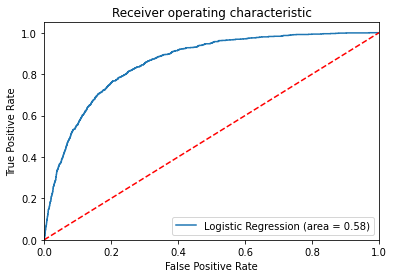

Area Under the Curve:  0.5830869815850925


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierLR1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierLR1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

#### From the Logistic Regression - 1 model:
1. Accuracy: 88.88% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 90%
    2. Class 1 = 56%
3. Recall: How many relevant items were selected?
    1. Class 0 = 98%
    2. Class 1 = 18%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 94%
    2. Class 1 = 28%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 7844 || TN = 195
    2. FP = 150 || FN = 855
6. ROC Curve: The ROC Curve above indicates the AUC value = 58.30%

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is also >70%, however, the AUC required should have been more

## Naive Bayes - 1

In [48]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifierNB1 = GaussianNB()
classifierNB1.fit(X_train, Y_train)

Y_pred_NB= classifierNB1.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred_NB))
print(confusion_matrix(Y_test, Y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred_NB,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7994
           1       0.34      0.46      0.39      1049

    accuracy                           0.83      9043
   macro avg       0.63      0.67      0.65      9043
weighted avg       0.86      0.83      0.84      9043

[[7069  925]
 [ 571  478]]
accuracy is 0.8345681742784474


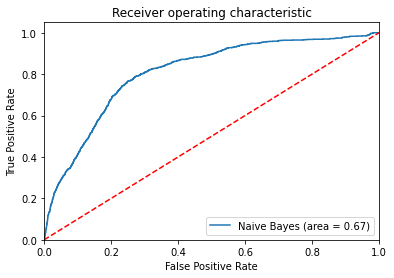

Area Under the Curve:  0.6699801423994594


In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

#### From the Naive Bayes - 1 model:
1. Accuracy: 83.45% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 93%
    2. Class 1 = 34%
3. Recall: How many relevant items were selected?
    1. Class 0 = 88%
    2. Class 1 = 46%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 90%
    2. Class 1 = 39%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 7069 || TN = 478
    2. FP = 925 || FN = 571
6. ROC Curve: The ROC Curve above indicates the AUC value = 66.99%

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is also >70%, however, the AUC required should have been more

## Decision Tree - 1

In [50]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifierDT1 = DecisionTreeClassifier()
classifierDT1.fit(X_train, Y_train)

y_pred_DT = classifierDT1.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_DT))
print(confusion_matrix(Y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DT,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7994
           1       0.44      0.44      0.44      1049

    accuracy                           0.87      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.87      0.87      0.87      9043

[[7408  586]
 [ 587  462]]
accuracy is 0.870286409377419


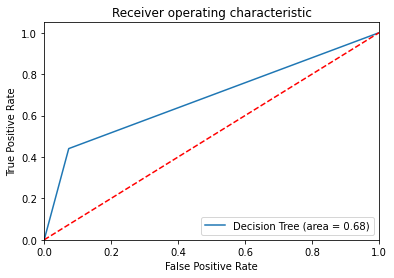

Area Under the Curve:  0.6835572341792092


In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierDT1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierDT1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

#### From the Decision Tree Classifier - 1 model:
1. Accuracy: 87.00% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 93%
    2. Class 1 = 44%
3. Recall: How many relevant items were selected?
    1. Class 0 = 93%
    2. Class 1 = 44%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 93%
    2. Class 1 = 44%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 7402 || TN = 466
    2. FP = 592 || FN = 583
6. ROC Curve: The ROC Curve above indicates the AUC value = 68.50%

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is also >70%, however, the AUC required should have been more

In [52]:
from sklearn.svm import SVC

classifierSVC = SVC()
classifierSVC.fit(X_train, Y_train)

y_pred_SVM = classifierSVC.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_SVM))
print(confusion_matrix(Y_test, y_pred_SVM))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_SVM,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7994
           1       0.66      0.27      0.39      1049

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043

[[7846  148]
 [ 763  286]]
accuracy is 0.8992590954329316


#### From the SVM - 1 model:
1. Accuracy: 89.99% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 91%
    2. Class 1 = 66%
3. Recall: How many relevant items were selected?
    1. Class 0 = 98%
    2. Class 1 = 27%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 95%
    2. Class 1 = 39%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 7846 || TN = 286
    2. FP = 286 || FN = 763

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is also >70%, So far better than other models

In [53]:
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier(n_neighbors=3)
classifierKNN.fit(X_train, Y_train)

y_pred_KNN = classifierKNN.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_KNN))
print(confusion_matrix(Y_test, y_pred_KNN))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_KNN,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7994
           1       0.54      0.36      0.43      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.66      0.68      9043
weighted avg       0.88      0.89      0.88      9043

[[7673  321]
 [ 673  376]]
accuracy is 0.8900807254229791


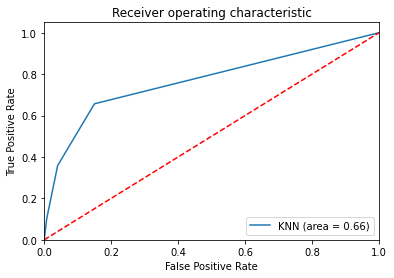

Area Under the Curve:  0.6591407449772267


In [54]:
logit_roc_auc = roc_auc_score(Y_test, classifierKNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierKNN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

#### From the KNN - 1 model:
1. Accuracy: 89.00% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 92%
    2. Class 1 = 54%
3. Recall: How many relevant items were selected?
    1. Class 0 = 96%
    2. Class 1 = 36%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 94%
    2. Class 1 = 43%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 7673 || TN = 376
    2. FP = 321 || FN = 673
6. ROC Curve: The ROC Curve above indicates the AUC value = 65.91%

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is also >70%, however, the AUC required should have been more

## Tuning using KMeans Cross Validation

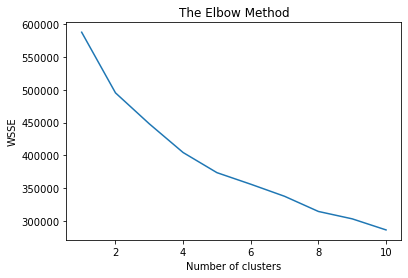

In [55]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = [] #within the clusters some of squared errors & inertia calculates those errors
for i in range(1, 11): #11 is excluding
    kmeans = KMeans(n_clusters = i, random_state = 10) #random_state is equivalent to set.seed, but number should be same so that models are matched
    kmeans.fit(X)
    wsse.append(kmeans.inertia_) # append helps to add a single element at a time
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [56]:
# LOGISTIC REGRESSION - 2
#Using cross validation
classifierLR2=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=6)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifierLR2,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifierLR2.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifierLR2.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=6, random_state=None, shuffle=False)
[0.89532183 0.8871931  0.89515594 0.89532183 0.89698076 0.8760783 ]
0.8910086264100863


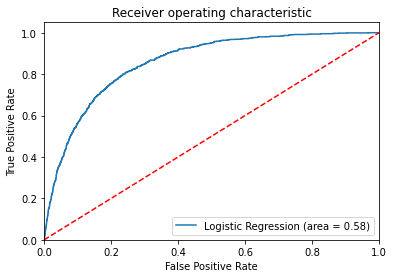

Area Under the Curve:  0.5836887198287181


In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierLR2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierLR2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

In [58]:
# NAIVE BAYES - 2
#Using cross validation
classifierNB2=(GaussianNB())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifierNB2,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifierNB2.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifierNB2.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=5, random_state=None, shuffle=False)
[0.8338402  0.83370196 0.83466962 0.83464676 0.81764137]
0.8308999803186031


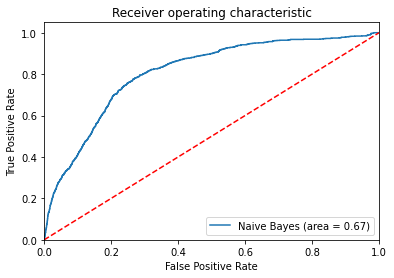

Area Under the Curve:  0.6685739399878793


In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierNB2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierNB2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

In [60]:
# DECISION TREE - 2
#Using cross validation
classifierDT2=(DecisionTreeClassifier())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=8)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifierDT2,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifierDT2.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifierDT2.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=8, random_state=None, shuffle=False)
[0.87215218 0.87082504 0.86396815 0.8739217  0.86551648 0.86883433
 0.86219863 0.85489936]
0.8665394824153949


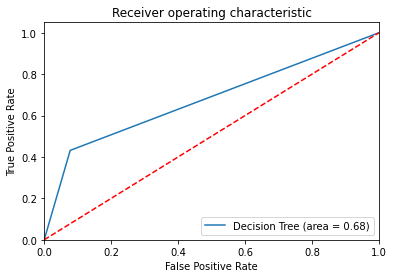

Area Under the Curve:  0.6770782925134747


In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifierDT2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierDT2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

In [62]:
# SVM - 2
#Using cross validation
classifierSVM2=(SVC())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=7)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifierSVM2,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifierSVM2.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifierSVM2.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=7, random_state=None, shuffle=False)
[0.90768338 0.89568415 0.89955487 0.90923166 0.89549061 0.89761951
 0.88598529]
0.8987499235612935


In [63]:
# KNN - 2
#Using cross validation
classifierKNN2=(KNeighborsClassifier())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifierKNN2,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifierKNN2.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifierKNN2.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=5, random_state=None, shuffle=False)
[0.89590821 0.89286702 0.89798175 0.89354348 0.88220655]
0.8925014030974443


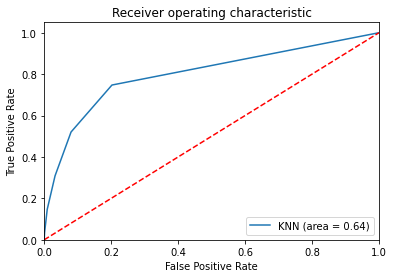

Area Under the Curve:  0.6382331433990174


In [64]:

logit_roc_auc = roc_auc_score(Y_test, classifierKNN2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifierKNN2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area Under the Curve: ", logit_roc_auc)

##### From KMeans Clustering method for Cross Validation:
1. Logistic Regression: 
    1. Accuracy: 89.10% (+0.22%)
    2. AUC: 58.36% (+0.06%)
    3. Splits: 6
2. Naive Bayes: 
    1. Accuracy: 83.08% (-0.37%)
    2. AUC: 66.85% (-0.14%)
    3. Splits: 5
3. Decision Tree: 
    1. Accuracy: 86.74% (-0.26%)
    2. AUC: 68.43% (-0.07%)
    3. Splits: 8
4. SVC/ SVM:
    1. Accuracy: 89.87% (-0.12%)
    2. Splits: 7
4. KNN:
    1. Accuracy: 89.25% (+0.25%)
    2. AUC: 63.63% (-2.28%)
    3. Splits: 5

As observed: Tuning the model using KMeans Clustering did not work well for *Naive Bayes* and *Decision Tree* but worked well for *Logistic Regression* and *KNN* (It is also seen that for *KNN* the AUC has dropped by 2.28%) however, the difference is only marginal. 

*Splits for each algorithm is different, because the accuracies for each algorithm changes with change in splits and the current number of ksplits for each algorithm is the best fit as they produce better results than the rest splits, however, the difference is only marginal*

## Threshold Adjustment - Tuning method

### Logistic Regression - 3 (Threshold Adjustmet)

In [65]:
#Store the predicted probbilities - Logistic Regression-1
Y_pred_prob = classifierLR1.predict_proba(X_test)
#print(Y_pred_prob)

for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7994  , type 2 error : 0  , type 1 error: 7994
Errors at threshold  0.01 : 7557  , type 2 error : 1  , type 1 error: 7556
Errors at threshold  0.02 : 6511  , type 2 error : 7  , type 1 error: 6504
Errors at threshold  0.03 : 5698  , type 2 error : 16  , type 1 error: 5682
Errors at threshold  0.04 : 5095  , type 2 error : 24  , type 1 error: 5071
Errors at threshold  0.05 : 4571  , type 2 error : 35  , type 1 error: 4536
Errors at threshold  0.06 : 4068  , type 2 error : 51  , type 1 error: 4017
Errors at threshold  0.07 : 3610  , type 2 error : 75  , type 1 error: 3535
Errors at threshold  0.08 : 3122  , type 2 error : 104  , type 1 error: 3018
Errors at threshold  0.09 : 2750  , type 2 error : 133  , type 1 error: 2617
Errors at threshold  0.1 : 2438  , type 2 error : 172  , type 1 error: 2266
Errors at threshold  0.11 : 2176  , type 2 error : 207  , type 1 error: 1969
Errors at threshold  0.12 : 1950  , type 2 error : 238  , type 1 error: 1712
Errors at th

In [66]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.60:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

## Creating a new Y_pred_class at Threshold 0.56 where Type1 error's and Type2 error's are minimum

In [67]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[7897   97]
 [ 901  148]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7994
           1       0.60      0.14      0.23      1049

    accuracy                           0.89      9043
   macro avg       0.75      0.56      0.58      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy of the model: 0.8896383943381622


### Naive Bayes - 3 (Threshold Adjustmet)

In [68]:
#Store the predicted probbilities - Logistic Regression-1
Y_pred_prob = classifierNB1.predict_proba(X_test)
#print(Y_pred_prob)

for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7994  , type 2 error : 0  , type 1 error: 7994
Errors at threshold  0.01 : 5143  , type 2 error : 54  , type 1 error: 5089
Errors at threshold  0.02 : 4733  , type 2 error : 64  , type 1 error: 4669
Errors at threshold  0.03 : 4540  , type 2 error : 76  , type 1 error: 4464
Errors at threshold  0.04 : 4399  , type 2 error : 84  , type 1 error: 4315
Errors at threshold  0.05 : 4246  , type 2 error : 97  , type 1 error: 4149
Errors at threshold  0.06 : 4105  , type 2 error : 109  , type 1 error: 3996
Errors at threshold  0.07 : 3886  , type 2 error : 121  , type 1 error: 3765
Errors at threshold  0.08 : 3684  , type 2 error : 127  , type 1 error: 3557
Errors at threshold  0.09 : 3442  , type 2 error : 135  , type 1 error: 3307
Errors at threshold  0.1 : 3222  , type 2 error : 148  , type 1 error: 3074
Errors at threshold  0.11 : 3022  , type 2 error : 169  , type 1 error: 2853
Errors at threshold  0.12 : 2824  , type 2 error : 181  , type 1 error: 2643
Errors a

In [69]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.60:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

## Creating a new Y_pred_class at Threshold 0.56 where Type1 error's and Type2 error's are minimum

In [70]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[7235  759]
 [ 635  414]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7994
           1       0.35      0.39      0.37      1049

    accuracy                           0.85      9043
   macro avg       0.64      0.65      0.64      9043
weighted avg       0.85      0.85      0.85      9043

Accuracy of the model: 0.8458476169412805


### Decision Tree - 3 (Threshold Adjustmet)

In [71]:
#Store the predicted probbilities - Logistic Regression-1
Y_pred_prob = classifierDT1.predict_proba(X_test)
#print(Y_pred_prob)

for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.01 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.02 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.03 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.04 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.05 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.06 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.07 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.08 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.09 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.1 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.11 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at threshold  0.12 : 1173  , type 2 error : 587  , type 1 error: 586
Errors at thre

In [72]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.60:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

## Creating a new Y_pred_class at Threshold 0.56 where Type1 error's and Type2 error's are minimum

In [73]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[7408  586]
 [ 587  462]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7994
           1       0.44      0.44      0.44      1049

    accuracy                           0.87      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy of the model: 0.870286409377419


### KNN - 3 (Threshold Adjustmet)

In [74]:
#Store the predicted probbilities - Logistic Regression-1
Y_pred_prob = classifierKNN.predict_proba(X_test)
#print(Y_pred_prob)

for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.01 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.02 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.03 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.04 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.05 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.06 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.07 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.08 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.09 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.1 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.11 : 1560  , type 2 error : 360  , type 1 error: 1200
Errors at threshold  0.12 : 1560  , type 2 error : 360  , type 1 error: 1200
E

In [75]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.60:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

## Creating a new Y_pred_class at Threshold 0.56 where Type1 error's and Type2 error's are minimum

In [76]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[7673  321]
 [ 673  376]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7994
           1       0.54      0.36      0.43      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.66      0.68      9043
weighted avg       0.88      0.89      0.88      9043

Accuracy of the model: 0.8900807254229791


#### Summary - Threshold Adjustment
From the above threshold adjustments models:
1. Logistic Regression 3:
    1. Accuracy: 88.96%
    2. Threshold Adjustment: 0.60
2. Naive Bayes 3:
    1. Accuracy: 84.58%
    2. Threshold Adjustment: 0.60
3. Decision Tree 3:
    1. Accuracy: 87.00%
    2. Threshold Adjustment: 0.60
4. KNN 3:
    1. Accuracy: 89.00%
    2. Threshold Adjustment: 0.60

# Project Summary:

### 1. Data Analysis report:
##### 1.1 About the data set:
   1. Orignal dataset shape = 45211 rows, 17 columns (including the target variable)
   2. No missing data
   3. Target variable with 2 unique instances (Yes and No)
   4. No major correlation between variables, however 45% (positive) correlation was detected among pdays and previous
   5. Outlier presence in almost all the variables
   6. Data after split: 
       1. X_train = (36,168, 13)
       2. X_test = (9,043, 13)
       3. Y_train = (36,168,1)
       4. Y_test = (9,043,1)

##### 1.2 Variable analysis:
   1. Age demographic observed is between 18-95 years of age, where maximum clients/ instances belong to the bin 30-40 years
   2. The balance maintained by clients/ instances also include negative balances i.e., defaulters
   3. The maximum duration a call lasted was 82mins, and minimum was 0 or no contact
   4. The campaign variable clearly indicates that most of the connection during the campaign takes place in the first seven contacts only, and then gradually decreases as the number of contacts increases
   5. previous
   6. Although the 3 primary target clients of the bank seem to be Blue-Collar clients, Clients of management background/ occupation, and Techincians (based on numbers of instances), the rate at which the three classes convert are far less than Students, Retired, and Unemployed, these classes have a better conversion rate as compared to all other categories
   7. The day of the month does not seem to affect the final output/ target variable as consistent subscribers and non-subscribers are observed
   8. Based on the number of subscribers per month - April, May, June, July and Aug seem to be important, but when the success percentage is checked - April, March, Sept, Oct and Dec seem to have more success rate
   9. It is observed that most of the clients have completed their secondary education, and more subscribers belong to that category
   10. It is also observed that the highest and the best mode of contact is Cellular

##### 1.3 Charts and Graphs:
   1. Seaborn and Matplotlib is used to prepare charts and graphs for this project
   2. Seaborn - Catplot, Countplot, and Heatmap
   3. Histograms to identify the majority age group clients
   4. Boxplot to identify presence outliers in each numeric variable

##### 1.4 Data Split:
   1. Data is first splitted into X and Y after pre-processing using Label Encoder
   2. Data gets standardized for model building using Standard Scaler
   3. Data is splitted in 80:20 ratio train:test)

### Model Report:
##### 2.1 Method 1 - Basic Model:
   1. Logistic Regression: Accuracy = 89% ; AUC = 58%
   2. Naive Bayes: Accuracy = 83% ; AUC = 67%
   3. Decision Tree: Accuracy = 87% ; AUC = 69%
   4. Support Vector Classifier: Accuracy = 90%
   5. KNearest Neighbors Classifier: Accuracy = 89% ; AUC = 66%
    
##### 2.2 Method 2 - KMeans Cross Validation (Tuning technique):
   1. Logistic Regression: Accuracy = 89% ; AUC = 58%
   2. Naive Bayes: Accuracy = 83% ; AUC = 67%
   3. Decision Tree: Accuracy = 87% ; AUC = 68%
   4. Support Vector Classifier: Accuracy = 90%
   5. KNearest Neighbors Classifier: Accuracy = 89% ; AUC = 64%
    
##### 2.3 Method 3 - Threshold Adjustment (Tuning technique):
   1. Logistic Regression: Accuracy = 89%
   2. Naive Bayes: Accuracy = 85%
   3. Decision Tree: Accuracy = 87%
   4. KNearest Neighbors Classifier: Accuracy = 89%
      
### Suggestions:
   1. The bank should start focusing on students who are particularly in their secondary or tertiary education level, and retired people who also have a secondary or tertiary degree, along with Blue-Collar clients, clients of management background/ occupation, and techincians
   2. The bank should start maintaining a reliable data and reduce UNKNOWN inputs so as to improve analysis
   3. The bank should increase its instances of contact during April, March, September, October and December, where the convert rate is higher than others, while not neglecting other months
   4. As observed earlier, the rate of campaign increases when number of contact is less, therefore the bank must not waste such opportunity and present all neccessary information to the client in the early stage of contact itself so as to increase the chances of getting more subscribers
   5. As it is observed that the duration for the same is also between 1min to 50mins, the employees of the bank must make best use of such time to feed information to the client in a way of enabling them to make decision quickly